# Подготовка к экзамену


In [1]:
%pwd

'C:\\Users\\Артём\\OneDrive - ФГОБУ ВО Финансовый университет при Правительстве РФ\\Учёба\\3 курс\\Технологии обработки BD\\Экзамен'

In [2]:
# %cd /content/drive/MyDrive/Семинары/Консультация/

In [3]:
%ls

 ’®¬ ў гбва®©бвўҐ C ­Ґ Ё¬ҐҐв ¬ҐвЄЁ.
 ‘ҐаЁ©­л© ­®¬Ґа в®¬ : A4D2-EA2D

 ‘®¤Ґа¦Ё¬®Ґ Ї ЇЄЁ C:\Users\Ђавс¬\OneDrive - ”ѓЋЃ“ ‚Ћ ”Ё­ ­б®ўл© г­ЁўҐабЁвҐв ЇаЁ Џа ўЁвҐ«мбвўҐ ђ”\“зсЎ \3 Єгаб\’Ґе­®«®ЈЁЁ ®Ўа Ў®вЄЁ BD\ќЄ§ ¬Ґ­

21.01.2023  13:04    <DIR>          .
21.01.2023  13:04    <DIR>          ..
21.01.2023  13:04    <DIR>          .ipynb_checkpoints
11.01.2022  21:15    <DIR>          data
21.01.2023  13:00            14я174 demo.docx
19.01.2023  14:55        26я640я495 demo_tasks.zip
20.01.2023  17:29             2я616 Untitled (2).ipynb
21.01.2023  13:04            45я175 Untitled0.ipynb
               4 д ©«®ў     26я702я460 Ў ©в
               4 Ї Ї®Є  84я101я140я480 Ў ©в бў®Ў®¤­®


### 1. Задан двухмерный массив ar1 размерности (10, 10), состоящий из случайных целых чисел в пределах от 0 до 15. Вычислить разность s_odd - s_even, где s_odd - сумма элементов, стоящих на позиции (x, y), где (x + y) является нечетным числом; s_even - сумма элементов, стоящих на позиции (x, y), где (x + y) является четным числом.
Решить задачу средствами numpy и/или pandas. Не использовать циклы и конструкции стандартного Python там, где можно использовать возможности данных библиотек


In [13]:
import numpy as np

In [23]:
ar1 = np.random.randint(0, 16, (10, 10))

In [24]:
ar1

array([[ 1,  5,  5, 13,  8, 14,  6, 10,  7, 13],
       [13,  1, 14,  2,  3,  3,  4,  1, 14,  3],
       [10,  8, 14, 13,  9,  5,  8,  3,  7, 14],
       [ 0,  6, 14, 15, 11,  9,  5, 14, 11, 11],
       [ 2,  6,  3,  5,  5, 10,  5,  7,  4,  1],
       [11, 11, 10, 11,  5,  2, 10, 10, 11,  8],
       [10, 13,  9, 11,  6,  5, 13,  9,  0, 11],
       [10, 14, 12,  1, 11,  0, 14, 13, 14,  6],
       [ 6,  5, 10,  0,  9,  6,  7, 10, 10,  3],
       [14, 13, 15, 13,  4,  9,  1, 11,  4,  4]])

In [33]:
ar1_ind = np.array(np.arange(10)) + np.array(np.arange(10)).reshape(10, 1)

In [53]:
odd_ind = (ar1_ind % 2 == 0)

In [54]:
s_odd = ar1[odd_ind]

In [55]:
s_odd

array([ 1,  5,  8,  6,  7,  1,  2,  3,  1,  3, 10, 14,  9,  8,  7,  6, 15,
        9, 14, 11,  2,  3,  5,  5,  4, 11, 11,  2, 10,  8, 10,  9,  6, 13,
        0, 14,  1,  0, 13,  6,  6, 10,  9,  7, 10, 13, 13,  9, 11,  4])

In [59]:
s_even = ar1[~odd_ind]
s_even

array([ 5, 13, 14, 10, 13, 13, 14,  3,  4, 14,  8, 13,  5,  3, 14,  0, 14,
       11,  5, 11,  6,  5, 10,  7,  1, 11, 10,  5, 10, 11, 13, 11,  5,  9,
       11, 10, 12, 11, 14, 14,  5,  0,  6, 10,  3, 14, 15,  4,  1,  4])

In [58]:
s_odd.sum() - s_even.sum()

-70

# 2. Датасет: Chinook_Sqlite.sqlite 
С помощью кода на Python с использованием sqlite3 и SQL решить задачу. Реализовать функции на Python:
1. Которая возвращает все имеющиеся жанры. 
2. Которая возвращает ID жанров, в которых написано более 100 треков, и их (жанров) название.


In [26]:
import sqlite3
con = sqlite3.connect("./data/Chinook_Sqlite.sqlite")

In [27]:
import pandas as pd

In [32]:
query = '''
select GenreId, Genre.Name from Genre 
right join Track using(GenreId)
GROUP BY GenreId
HAVING count(TrackId) > 100
'''

In [33]:
genres = pd.read_sql('select * from Genre', con, index_col='GenreId')
genres

,Name
GenreId,
1,Rock
2,Jazz
3,Metal
4,Alternative & Punk
5,Rock And Roll
6,Blues
7,Latin
8,Reggae
9,Pop


In [34]:
genres_100 = pd.read_sql(query, con, index_col='GenreId')
genres_100

,Name
GenreId,
1,Rock
2,Jazz
3,Metal
4,Alternative & Punk
7,Latin


In [103]:
genres.Name.values

array(['Rock', 'Jazz', 'Metal', 'Alternative & Punk', 'Rock And Roll',
       'Blues', 'Latin', 'Reggae', 'Pop', 'Soundtrack', 'Bossa Nova',
       'Easy Listening', 'Heavy Metal', 'R&B/Soul', 'Electronica/Dance',
       'World', 'Hip Hop/Rap', 'Science Fiction', 'TV Shows',
       'Sci Fi & Fantasy', 'Drama', 'Comedy', 'Alternative', 'Classical',
       'Opera'], dtype=object)

In [95]:
genres[pd.read_sql(query, con).groupby('GenreId')['TrackId'].count() > 100]

,Name
GenreId,
1,Rock
2,Jazz
3,Metal
4,Alternative & Punk
7,Latin


# 3. Датасет: album_artist.xlsx
С помощью кода на Python с использованием xlwings решить задачу. Вынести названия артистов на отдельный лист "Артисты" и присвоить каждому артисту уникальный идентификатор. Заменить названия артистов на исходном листе на идентификаторы с листа "Артисты".


In [ ]:
import xlwings

In [61]:
cur = con.cursor()

In [ ]:
book = xlwings.Book("album_artist.xlsx")

In [ ]:
sheet = book.sheets['Sheet1']

In [ ]:
import numpy as np

In [ ]:
names = sheet.range("D2").expand("down").options(np.array).value

In [ ]:
unique_names = np.unique(names)

In [ ]:
new_sheet = book.sheets.add("Артисты")
new_sheet.range("A2").value = np.arange(len(unique_names)).reshape(-1, 1)
new_sheet.range("B2").value = unique_names.reshape(-1, 1)

# 4. Датасет: us-countries.csv
Создайте таблицу, где по строкам располагаются названия штатов, по столбцам - каждый из 12 месяцев 2020 года, а в ячейках таблицы хранится суммарное количество смертей в данном штате в этот месяц. Если информация за какой-то месяц отсутствует, укажите в этой ячейке значение 0.


In [12]:
df_countries = pd.read_csv('./data/us-counties.csv', parse_dates=['date'])
df_countries.head(5)

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0


In [6]:
df_countries

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0
...,...,...,...,...,...,...
2089614,2022-01-06,Sweetwater,Wyoming,56037.0,8471,110.0
2089615,2022-01-06,Teton,Wyoming,56039.0,6836,14.0
2089616,2022-01-06,Uinta,Wyoming,56041.0,4245,34.0
2089617,2022-01-06,Washakie,Wyoming,56043.0,1908,39.0


In [7]:
df_countries['state']

0          Washington
1          Washington
2          Washington
3            Illinois
4          Washington
              ...    
2089614       Wyoming
2089615       Wyoming
2089616       Wyoming
2089617       Wyoming
2089618       Wyoming
Name: state, Length: 2089619, dtype: object

In [13]:
df_countries_2020 = df_countries[df_countries['date'].dt.year == 2020]
df_countries_2020.head(5)

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0


In [14]:
df_countries_2020['month'] = df_countries_2020.date.dt.month

C:\Users\Артём\AppData\Local\Temp\ipykernel_18344\27632059.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_countries_2020['month'] = df_countries_2020.date.dt.month


In [25]:

pd.pivot_table(df_countries_2020,
              values = 'deaths',
              index = 'state',
              columns = 'month',
              aggfunc = 'sum',
              fill_value = 0)

month,1,2,3,4,5,6,7,8,9,10,11,12
state,,,,,,,,,,,,
Alabama,0,0,42,4044,14438,23697,38436,58883,71419,85064,98538,131827
Alaska,0,0,8,173,243,291,496,843,1265,1890,2802,5136
Arizona,0,0,118,4870,19864,37510,79906,138063,161423,179976,189527,237564
Arkansas,0,0,36,1007,3137,5895,10829,19077,32549,51328,66765,95245
California,0,0,1113,30176,99379,155690,232621,349458,438311,522654,551791,683920
Colorado,0,0,344,11715,35594,48035,54290,58799,60271,67610,79208,127004
Connecticut,0,0,283,29752,101014,125398,135762,138000,134566,141104,143360,170624
Delaware,0,0,31,1840,8381,13062,16554,18439,18572,20617,22110,26058
District of Columbia,0,0,41,2651,11296,15437,17731,18495,18516,19785,19873,22570


In [11]:
df_1 = df_countries_2020.groupby(['state', 'month'])['deaths'].sum().to_frame().unstack()
df_1.columns = df_1.columns.get_level_values(1)
df_1.index.name = None
df_1.fillna(0, inplace=True)
df_1

month,1,2,3,4,5,6,7,8,9,10,11,12
Alabama,0.0,0.0,42.0,4044.0,14438.0,23697.0,38436.0,58883.0,71419.0,85064.0,98538.0,131827.0
Alaska,0.0,0.0,8.0,173.0,243.0,291.0,496.0,843.0,1265.0,1890.0,2802.0,5136.0
Arizona,0.0,0.0,118.0,4870.0,19864.0,37510.0,79906.0,138063.0,161423.0,179976.0,189527.0,237564.0
Arkansas,0.0,0.0,36.0,1007.0,3137.0,5895.0,10829.0,19077.0,32549.0,51328.0,66765.0,95245.0
California,0.0,0.0,1113.0,30176.0,99379.0,155690.0,232621.0,349458.0,438311.0,522654.0,551791.0,683920.0
Colorado,0.0,0.0,344.0,11715.0,35594.0,48035.0,54290.0,58799.0,60271.0,67610.0,79208.0,127004.0
Connecticut,0.0,0.0,283.0,29752.0,101014.0,125398.0,135762.0,138000.0,134566.0,141104.0,143360.0,170624.0
Delaware,0.0,0.0,31.0,1840.0,8381.0,13062.0,16554.0,18439.0,18572.0,20617.0,22110.0,26058.0
District of Columbia,0.0,0.0,41.0,2651.0,11296.0,15437.0,17731.0,18495.0,18516.0,19785.0,19873.0,22570.0
Florida,0.0,0.0,489.0,19495.0,59664.0,89605.0,149112.0,287667.0,385716.0,486884.0,528358.0,625248.0


### 5. По данным из файла data/meals.json сформировать словарь, в котором по идентификатору блюда можно получить список ингредиентов.

In [1]:
import json 

with open('./data/meals.json') as fp:
    data = json.load(fp)

In [230]:
df2 = pd.DataFrame.from_dict(data['meals']).replace('', None)
df2.T;

In [2]:
data

{'meals': [{'idMeal': '52768',
   'strMeal': 'Apple Frangipan Tart',
   'strDrinkAlternate': None,
   'strCategory': 'Dessert',
   'strArea': 'British',
   'strInstructions': 'Preheat the oven to 200C/180C Fan/Gas 6.\r\nPut the biscuits in a large re-sealable freezer bag and bash with a rolling pin into fine crumbs. Melt the butter in a small pan, then add the biscuit crumbs and stir until coated with butter. Tip into the tart tin and, using the back of a spoon, press over the base and sides of the tin to give an even layer. Chill in the fridge while you make the filling.\r\nCream together the butter and sugar until light and fluffy. You can do this in a food processor if you have one. Process for 2-3 minutes. Mix in the eggs, then add the ground almonds and almond extract and blend until well combined.\r\nPeel the apples, and cut thin slices of apple. Do this at the last minute to prevent the apple going brown. Arrange the slices over the biscuit base. Spread the frangipane filling ev

In [233]:
df2

,idMeal,strMeal,strDrinkAlternate,strCategory,strArea,strInstructions,strMealThumb,strTags,strYoutube,strIngredient1,...,strMeasure15,strMeasure16,strMeasure17,strMeasure18,strMeasure19,strMeasure20,strSource,strImageSource,strCreativeCommonsConfirmed,dateModified
0,52768,Apple Frangipan Tart,None,Dessert,British,Preheat the oven to 200C/180C Fan/Gas 6.\r\nPu...,https://www.themealdb.com/images/media/meals/w...,"Tart,Baking,Fruity",https://www.youtube.com/watch?v=rp8Slv4INLk,digestive biscuits,...,None,None,None,None,None,None,None,None,None,None
1,52893,Apple & Blackberry Crumble,None,Dessert,British,Heat oven to 190C/170C fan/gas 5. Tip the flou...,https://www.themealdb.com/images/media/meals/x...,Pudding,https://www.youtube.com/watch?v=4vhcOwVBDO4,Plain Flour,...,None,None,None,None,None,None,https://www.bbcgoodfood.com/recipes/778642/app...,None,None,None
2,53049,Apam balik,None,Dessert,Malaysian,"Mix milk, oil and egg together. Sift flour, ba...",https://www.themealdb.com/images/media/meals/a...,None,https://www.youtube.com/watch?v=6R8ffRRJcrg,Milk,...,,,,,,,https://www.nyonyacooking.com/recipes/apam-bal...,None,None,None
3,53050,Ayam Percik,None,Chicken,Malaysian,"In a blender, add the ingredients for the spic...",https://www.themealdb.com/images/media/meals/0...,None,https://www.youtube.com/watch?v=9ytR28QK6I8,Chicken Thighs,...,,,,,,,http://www.curiousnut.com/roasted-spiced-chick...,None,None,None


In [225]:
dict_recipe = {}
def get_ing(x):
    global dict_recipe
    dict_recipe[x['idMeal']] = x[[f'strIngredient{i}' for i in range(1, 21)]].dropna().values
    

In [228]:
df2.apply(get_ing, axis=1);

In [229]:
dict_recipe

{'52768': array(['digestive biscuits', 'butter', 'Bramley apples',
        'butter, softened', 'caster sugar', 'free-range eggs, beaten',
        'ground almonds', 'almond extract', 'flaked almonds'], dtype=object),
 '52893': array(['Plain Flour', 'Caster Sugar', 'Butter', 'Braeburn Apples',
        'Butter', 'Demerara Sugar', 'Blackberrys', 'Cinnamon', 'Ice Cream'],
       dtype=object),
 '53049': array(['Milk', 'Oil', 'Eggs', 'Flour', 'Baking Powder', 'Salt',
        'Unsalted Butter', 'Sugar', 'Peanut Butter'], dtype=object),
 '53050': array(['Chicken Thighs', 'Challots', 'Ginger', 'Garlic Clove',
        'Cayenne Pepper', 'Turmeric', 'Cumin', 'Coriander', 'Fennel',
        'Tamarind Paste', 'Coconut Milk', 'Sugar', 'Water'], dtype=object)}

6. Датасет: Womens Clothing E-Commerce Reviews.csv
Для каждого уникального значения в столбце Division Name найти топ-5 самых часто используемых слов в описании отзыва. Исключить из рассмотрения стоп-слова.


In [45]:
import pandas as pd

In [46]:
%pwd

'C:\\Users\\Артём\\OneDrive - ФГОБУ ВО Финансовый университет при Правительстве РФ\\Учёба\\3 курс\\Технологии обработки BD\\Экзамен'

In [47]:
data = pd.read_csv("./data/Womens Clothing E-Commerce Reviews.csv")
data.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [ ]:
#nltk.download('stopwords')

In [48]:
from nltk.corpus import stopwords
from nltk import word_tokenize
cachedStopWords = stopwords.words("english")

data['Review Text without stopwords'] = data['Review Text']\
    .apply(lambda w: ' '.join([word for word in str(w).split() if word not in cachedStopWords]))

In [310]:
def f(s):
    return s.str.split().explode().value_counts().head(5)

In [311]:
data.groupby("Division Name")["Review Text without stopwords"].apply(f)

Division Name        
General         I        5193
                dress    4466
                love     4331
                size     4013
                like     3935
General Petite  dress    3151
                I        3057
                love     2594
                size     2375
                like     2355
Initmates       I         502
                love      441
                like      392
                size      390
                wear      377
Name: Review Text without stopwords, dtype: int64

# 7. Датасет: people.*.csv
В people.*.csv найти номера карт, сумма цифр в которых кратна 7. Выполнить задание с использованием Dask, распараллелив процесс обработки данных. Выполнить задание с использованием Dask (корректным!), распараллелив процесс обработки данных (использование Dask должно приводить к истинной параллельной обработке данных).


# 1 способ с использованием dask.dataframe:

In [70]:
import dask.delayed 
import dask.bag as db
import dask.dataframe as dd

In [71]:
df_people = dd.read_csv('./data/people/people.*.csv')
df_people = df_people.drop(['Unnamed: 0'], axis=1)
df_people;

In [72]:
def sum_mod7(df):
    return sum(map(int, str(df['card']).replace(' ',''))) % 7 == 0 

In [73]:
df_people[df_people.map(sum_mod7, axis=1, meta='card')].compute().head()

AttributeError: 'DataFrame' object has no attribute 'map'

In [395]:
%%timeit
df_people[df_people.apply(sum_mod7, axis=1, meta='card')].compute()

93.6 ms ± 2.58 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


# 2 способ с распараллеливанием (dask.delayed):

In [66]:
def boost_mod7(path):
    df_people = pd.read_csv(path)
    return df_people[df_people.map(lambda x: sum(map(int, str(x['card']).replace(' ',''))) % 7 == 0 , axis=1)]

### Выполнение без ускорения:

In [67]:
%%timeit
for i in range(3):
    boost_mod7(f'./data/people/people.{i}.csv')

AttributeError: 'DataFrame' object has no attribute 'map'

### Выполнение с dask.delayed:

In [68]:
boost_mod7_delayed = dask.delayed(boost_mod7)

In [69]:
%%timeit
r = [boost_mod7_delayed(f'./data/people/people.{i}.csv') for i in range(3)]
r = dask.compute(r, scheduler="threading")

AttributeError: 'DataFrame' object has no attribute 'map'

In [450]:
%%timeit
r = [boost_mod7_delayed(f'./data/people/people.{i}.csv') for i in range(3)]
r = dask.compute(r, scheduler="multiprocessing")

1.42 s ± 51.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### 8. Подсчитать, сколько раз во всех текстовых файлах, лежащих в каталоге fish, встречаются слова, начинающиеся с прописной буквы. Выполнить задание с использованием Dask, распараллелив процесс обработки данных. Выполнить задание с использованием Dask (корректным!), распараллелив процесс обработки данных (использование Dask должно приводить к истинной параллельной обработке данных).

9. Сгенерируйте 10 строк длиной в 10000 символов, состоящих из маленьких английских букв. Посчитайте, сколько раз в этих 10 строках встречается шаблон "x?y?z", где знак вопроса обозначает один любой символ. Решение этой задачи распараллелить, используя multiprocessing Pool. Сравнить продолжительность последовательного и параллельного решения задачи.

In [18]:
import numpy as np
alphabet = list("abcdefghijklmnopqrstuvwxyz")
def generate():
    return "".join(np.random.choice(alphabet, 10_000, replace=True))

In [19]:
generate()[:10]

'tzlvgwfsrf'

In [20]:
import re 

patt = re.compile(r"x.y.z")
def find(s):
    return len(patt.findall(s))

In [26]:
%%time
r = [find(generate()) for _ in range(10)]

CPU times: user 31.3 ms, sys: 0 ns, total: 31.3 ms
Wall time: 34.4 ms


In [27]:
%%file task9.py
import re 

patt = re.compile(r"x.y.z")
def find(s):
    return len(patt.findall(s))

Writing task9.py


In [28]:
from task9 import find

In [ ]:
import multiprocessing as mp

In [31]:
%%time
inputs  = [generate() for _ in range(10)]

with mp.Pool(processes=4) as pool:
    r = pool.map(find, inputs)
sum(r)

CPU times: user 42.1 ms, sys: 37 ms, total: 79.1 ms
Wall time: 104 ms


9

. Датасет: people.*.csv
В people.*.csv найти номера карт, сумма цифр в которых кратна 7. 

Выполнить задание с использованием Dask, распараллелив процесс обработки данных. Выполнить задание с использованием Dask (корректным!), распараллелив процесс обработки данных (использование Dask должно приводить к истинной параллельной обработке данных).


In [56]:
import dask.dataframe as dd

In [58]:
ddf = dd.read_csv("./data/people/people.*.csv")
ddf.head(5)

,Unnamed: 0,age,occupation,telephone,first_name,last_name,addr,city,card,expiration-date
0,0,28,Tax Advisor,1-786-676-1158,Sandy,Rutledge,416 Pierce Trail,University City,5438 1968 9922 9337,10/24
1,1,55,Legal Assistant,1-406-212-9158,Monte,Mcintyre,1235 Shoup Court,Palos Hills,3769 395661 41045,04/25
2,2,34,Art Critic,461-809-0929,Verdell,Ramirez,871 Ver Mehr Extension,De Pere,2657 4280 9607 4252,10/17
3,3,22,Induction Moulder,1-425-095-5808,Reggie,Lopez,1264 Fourth Highway,Ormond Beach,3454 218578 39569,08/18
4,4,21,Moneylender,(677) 465-7284,Foster,Campos,1036 Rex Side road,Parkersburg,4994 8117 4888 3147,02/25


In [59]:
def f(s):
    return sum(int(d) for d in s if d.isdigit())

In [60]:
f("34 12	")

10

In [65]:
%%timeit
ddf[ddf["card"].map(f) % 7 == 0].compute()

68.5 ms ± 1.27 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Создайте dask.array размерности 10 тыс на 5, заполненный случайными целыми числами на отрезке [0, 10]. Создайте версию этого массива, оставив только строки, в которых есть число 7

In [75]:
import dask.array as da

In [76]:
arr = da.random.randint(0, 11, (10_000, 5))

In [77]:
(arr == 7).any(axis=1)

dask.array<any-aggregate, shape=(10000,), dtype=bool, chunksize=(10000,), chunktype=numpy.ndarray>

In [78]:
arr[(arr == 7).any(axis=1)].compute()

array([[ 2,  4, 10,  7,  8],
       [ 1,  7,  0, 10,  5],
       [ 9,  9,  8,  7,  1],
       ...,
       [ 9,  5,  7,  2,  7],
       [ 4,  9,  2,  9,  7],
       [ 9,  0,  7,  5,  3]])

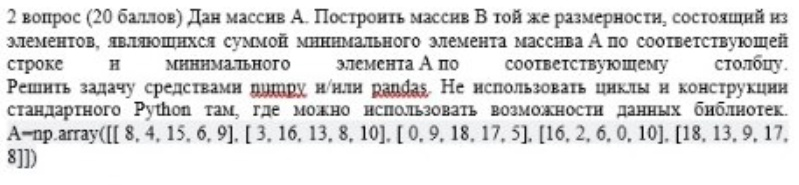

In [79]:
A = np.array([[8, 4, 15, 6, 9], [3, 16, 13, 8, 10], [0, 9, 18, 17, 5], [16, 2, 6, 0, 10], [18, 13, 9, 17, 8]])
A

array([[ 8,  4, 15,  6,  9],
       [ 3, 16, 13,  8, 10],
       [ 0,  9, 18, 17,  5],
       [16,  2,  6,  0, 10],
       [18, 13,  9, 17,  8]])

In [85]:
B = A.min(axis=0) + A.min(axis=1).reshape(-1,1)
B

array([[ 4,  6, 10,  4,  9],
       [ 3,  5,  9,  3,  8],
       [ 0,  2,  6,  0,  5],
       [ 0,  2,  6,  0,  5],
       [ 8, 10, 14,  8, 13]])

In [93]:
?db.

Object `db.filter` not found.
